### Install the package

In [ ]:
! pip install git+https://github.com/divamgupta/image-segmentation-keras


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Cloning https://github.com/divamgupta/image-segmentation-keras to /tmp/pip-req-build-dqpe0d6d
  Running command git clone -q https://github.com/divamgupta/image-segmentation-keras /tmp/pip-req-build-dqpe0d6d
     |████████████████████████████████| 2.9 MB 8.5 MB/s 
     |████████████████████████████████| 3.3 MB 50.5 MB/s 
     |████████████████████████████████| 948 kB 65.4 MB/s 
  Created wheel for keras-segmentation: filename=keras_segmentation-0.3.0-py3-none-any.whl size=34604 sha256=6aebcd3725f29bf44f2790ec41b6a22c847727d9eda529724402a1645a6178d5
  Stored in directory: /tmp/pip-ephem-wheel-cache-_yxdihcs/wheels/78/73/a2/4ee9fce73985dcc4f889d3d012a4461d58254d0de99197af00
Successfully built keras-segmentation
  Attempting uninstall: imageio
    Found existing installation: imageio 2.4.1
    Uninstalling imageio-2.4.1:
      Successfully uninstalled imageio-2.4.1
  Attempting uninstall: 

### Download the dataset

In [ ]:
from google.colab import drive

drive.mount('/content/drive/')

!unzip '/content/drive/My Drive/Computer_Vision/dataset_final_project.zip'

Mounted at /content/drive/
Archive:  /content/drive/My Drive/Computer_Vision/dataset_final_project.zip
  inflating: dataset/annotations_prepped_test/0016E5_08039.png  
  inflating: dataset/annotations_prepped_test/0016E5_08023.png  
  inflating: dataset/annotations_prepped_test/0016E5_08029.png  
  inflating: dataset/annotations_prepped_test/0016E5_08077.png  
  inflating: dataset/annotations_prepped_test/0016E5_08053.png  
  inflating: dataset/annotations_prepped_test/0016E5_07977.png  
  inflating: dataset/annotations_prepped_test/0016E5_08011.png  
  inflating: dataset/annotations_prepped_test/0016E5_07995.png  
  inflating: dataset/annotations_prepped_test/0016E5_08045.png  
  inflating: dataset/annotations_prepped_test/0016E5_08031.png  
  inflating: dataset/annotations_prepped_test/0016E5_08071.png  
  inflating: dataset/annotations_prepped_test/0016E5_08061.png  
  inflating: dataset/annotations_prepped_test/0016E5_08081.png  
  inflating: dataset/annotations_prepped_test/0016E5

Import Library

In [ ]:
import os
import cv2
import random
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

In [ ]:
plt.style.use('dark_background')

plt.rcParams.update({
    "lines.color": "white",
    "patch.edgecolor": "white",
    "text.color": "white",
    "axes.facecolor": "black",
    "axes.edgecolor": "white",
    "axes.labelcolor": "white",
    "xtick.color": "white",
    "ytick.color": "white",
    "grid.color": "grey",
    "figure.facecolor": "black",
    "figure.edgecolor": "black",
    "savefig.facecolor": "black",
    "savefig.edgecolor": "black"})

Load Dataset

In [ ]:
# dataset path
ROOT_DATASET = 'dataset'
os.listdir(ROOT_DATASET)

['images_prepped_test',
 'annotations_prepped_train',
 'images_prepped_train',
 'annotations_prepped_test']

In [ ]:
img_path = ROOT_DATASET + '/images_prepped_train/'
annot_path = ROOT_DATASET + '/annotations_prepped_train/'

In [ ]:
import glob

train_images_dir = glob.glob(img_path+'/*.png')
train_annotations_dir = glob.glob(annot_path+'/*.png')

In [ ]:
train_images = []
for img in train_images_dir:
    n = cv2.imread(img)
    train_images.append(n)

In [ ]:
train_annotations = []
for img in train_annotations_dir:
    n = cv2.imread(img)
    train_annotations.append(n)

In [ ]:
def get_colored_segmentation_image(seg, colors,
                                    n_classes):
    """ Return a colored segmented image """
    seg_img = np.zeros_like(seg)

    for c in range(n_classes):
        seg_img[:, :, 0] += ((seg[:, :, 0] == c)
                             * (colors[c][0])).astype('uint8')
        seg_img[:, :, 1] += ((seg[:, :, 0] == c)
                             * (colors[c][1])).astype('uint8')
        seg_img[:, :, 2] += ((seg[:, :, 0] == c)
                             * (colors[c][2])).astype('uint8')
    return seg_img

# initiate fix colors list
class_colors = [(128,0,0), (170,110, 40), (128,128,0), (0,128,128), (0,0,128), (230,25,75), (245,130,48), (255,255,25), (210,245,60), (240,50,230),
               (128,128,128), (220,190,255), (255,215,180), (70,140,240), (0,130,200)]

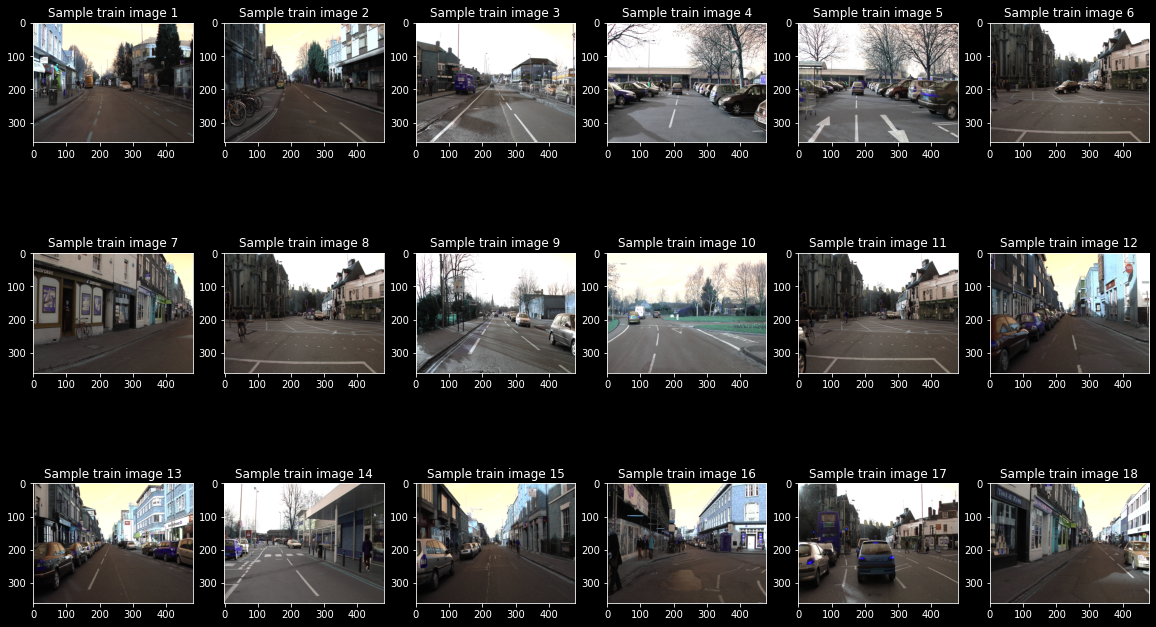

In [ ]:
#Plot sample of train images
fig = plt.figure(figsize = (20,12))

for index in range(18):
    ax = fig.add_subplot(3,6,index+1)
    ax.set_title("Sample train image {}".format(index+1))
    ax.imshow(train_images[index], cmap='gray')

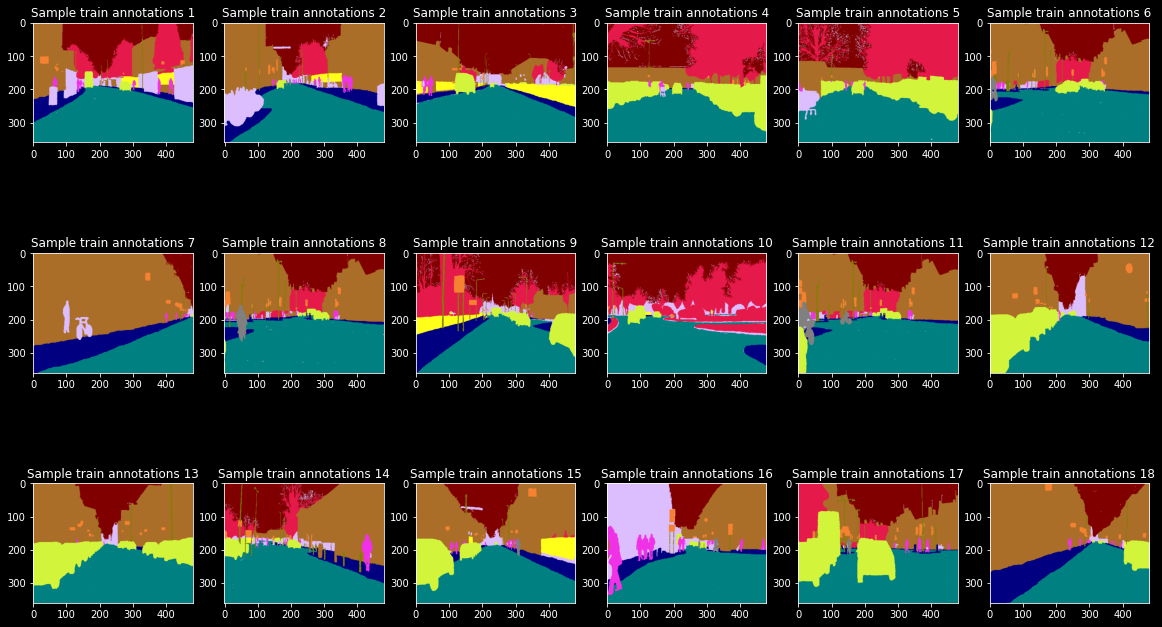

In [ ]:
#Plot sample of train annotations
fig = plt.figure(figsize = (20,12))


for index in range(18):
#     image = mpimg.imread(os.path.join(train_annotations_dir, os.listdir(train_annotations_dir)[index]))
    ax = fig.add_subplot(3,6,index+1)
    ax.set_title("Sample train annotations {}".format(index+1))
    ax.imshow(get_colored_segmentation_image(train_annotations[index],n_classes=12,colors=class_colors))

In [ ]:
print("There are {} images in train images".format(len(os.listdir(img_path))))
print("\nThere are {} images in train annotations".format(len(os.listdir(annot_path))))

There are 367 images in train images

There are 367 images in train annotations


In [ ]:
print("shape of one sample image in train images dataset: {}".format(train_images[0].shape))
print("\nshape of one sample image in train annotations dataset: {}".format(train_annotations[0].shape))

shape of one sample image in train images dataset: (360, 480, 3)

shape of one sample image in train annotations dataset: (360, 480, 3)


### Initialize the model

In [ ]:
from keras_segmentation.models.unet import vgg_unet

model = vgg_unet(n_classes=12 ,  input_height=320, input_width=640)


58900480/58889256 [==============================] - 2s 0us/step


### Train the model

In [ ]:
model.train(
    train_images =  "dataset/images_prepped_train/",
    train_annotations = "dataset/annotations_prepped_train/",
    val_images="dataset/images_prepped_test/",
    val_annotations="dataset/annotations_prepped_test/",
    checkpoints_path = "/tmp/vgg_unet_1" , epochs=10  
)

Verifying training dataset


100%|██████████| 367/367 [00:02<00:00, 155.15it/s]


Dataset verified! 
Epoch 1/10
512/512 [==============================] - ETA: 0s - loss: 0.7715 - accuracy: 0.7649
Epoch 1: saving model to /tmp/vgg_unet_1.00001
512/512 [==============================] - 107s 178ms/step - loss: 0.7715 - accuracy: 0.7649
Epoch 2/10
512/512 [==============================] - ETA: 0s - loss: 0.4737 - accuracy: 0.8526
Epoch 2: saving model to /tmp/vgg_unet_1.00002
512/512 [==============================] - 92s 181ms/step - loss: 0.4737 - accuracy: 0.8526
Epoch 3/10
512/512 [==============================] - ETA: 0s - loss: 0.3788 - accuracy: 0.8800
Epoch 3: saving model to /tmp/vgg_unet_1.00003
512/512 [==============================] - 92s 180ms/step - loss: 0.3788 - accuracy: 0.8800
Epoch 4/10
512/512 [==============================] - ETA: 0s - loss: 0.3196 - accuracy: 0.8970
Epoch 4: saving model to /tmp/vgg_unet_1.00004
512/512 [==============================] - 92s 180ms/step - loss: 0.3196 - accuracy: 0.8970
Epoch 5/10
512/512 [====================

In [ ]:
model.save('vgg_unet_1.00010')

INFO:tensorflow:Assets written to: vgg_unet_1.00005/assets


In [ ]:
out = model.predict_segmentation(
    inp="dataset/images_prepped_test/0016E5_08005.png",
    out_fname="/tmp/out.png"
)

Text(0.5, 1.0, 'Prediction on test image')

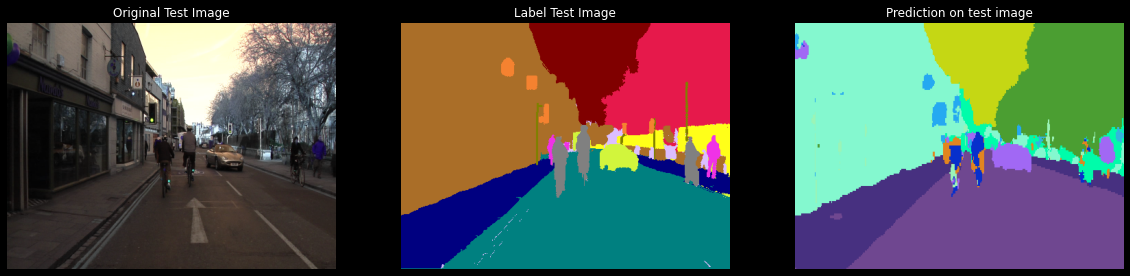

In [ ]:
# create figure
fig = plt.figure(figsize=(20, 20))
  
# setting values to rows and column variables
rows = 1
columns = 3
  
# reading images
Image1 = cv2.imread("dataset/images_prepped_test/0016E5_08005.png")
Image2 = cv2.imread("dataset/annotations_prepped_test/0016E5_08005.png")
Image3 = cv2.imread("/tmp/out.png")
  
# Adds a subplot at the 1st position
fig.add_subplot(rows, columns, 1)
  
# showing image
plt.imshow(Image1)
plt.axis('off')
plt.title('Original Test Image')
  
# Adds a subplot at the 2nd position
fig.add_subplot(rows, columns, 2)
  
# showing image
plt.imshow(get_colored_segmentation_image(Image2, n_classes=12, colors=class_colors))
plt.axis('off')
plt.title("Label Test Image")
  
# Adds a subplot at the 3rd position
fig.add_subplot(rows, columns, 3)
  
# showing image
plt.imshow(Image3)
plt.axis('off')
plt.title("Prediction on test image")